# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Fri Sep  1 09:20:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available else 'cpu'

2.0.1+cu118


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torch
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root='data',
                            train=True,
                            transform=ToTensor(),
                            target_transform=None,
                            download=True)

test_data = datasets.MNIST(root='data',
                           train=False,
                           transform=ToTensor(),
                           download=True
                           )

100%|██████████| 9912422/9912422 [00:00<00:00, 131260079.13it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30185819.54it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41599346.75it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 5840137.57it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

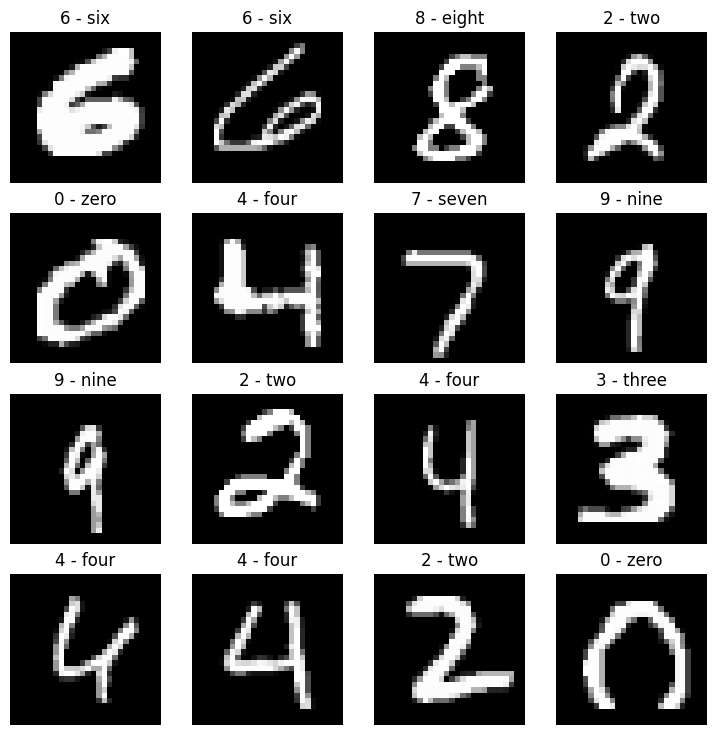

In [4]:
import matplotlib.pyplot as plt

class_names = train_data.classes

class_names

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f'Length of Train DataLoader: {len(train_dataloader)}')
print(f'Length of Test DataLoader: {len(test_dataloader)}')

Length of Train DataLoader: 1875
Length of Test DataLoader: 313


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
import torch
from torch import nn

class MNISTModelV1(nn.Module):
  def __init__(self, input:int, hidden_units:int, output:int):
    super().__init__()
    self.conv_layer1 = nn.Sequential(
        nn.Conv2d(in_channels=input,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_layer2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output)
    )

  def forward(self, x):
    x = self.conv_layer1(x)
    x = self.conv_layer2(x)
    x = self.classifier_layer(x)
    return x

In [7]:
MNISTModel = MNISTModelV1(input=1, hidden_units=10, output=len(class_names))
MNISTModel

MNISTModelV1(
  (conv_layer1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [8]:
# Loss and Optimizer Function

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=MNISTModel.parameters(),
                            lr=1e-1)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [20]:
device

'cuda'

In [21]:
torch.manual_seed(42)

device = 'cpu'
# Send the model to cpu
MNISTModel.to(device)

epochs = 5

# Training Loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n----------')
  train_loss = 0
  for batch, (X, y) in enumerate (train_dataloader):
    X, y = X.to(device), y.to(device)

    MNISTModel.train()
    # Forward Pass
    train_preds = MNISTModel(X)

    #Calculate Loss
    loss = loss_fn(train_preds, y)
    train_loss += loss

    # Optimizer Zero Grad
    optimizer.zero_grad()

    # Backprop
    loss.backward()

    # Gradient Descent
    optimizer.step()

  train_loss/=len(train_dataloader)
  print(f'Train Loss on {device}:{train_loss:5f}')



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------
Train Loss on cpu:0.021499
Epoch: 1
----------
Train Loss on cpu:0.020233
Epoch: 2
----------
Train Loss on cpu:0.021089
Epoch: 3
----------
Train Loss on cpu:0.018924
Epoch: 4
----------
Train Loss on cpu:0.017970


In [22]:
torch.manual_seed(42)

epochs = 5
device = 'cpu'

# Testing loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n--------')
  test_loss = 0
  MNISTModel.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      MNISTModel.to(device)
      X_test. y_test = X_test.to(device), y_test.to(device)

      # Forward Pass
      test_preds = MNISTModel(X_test)

      # Calculate Loss
      loss = loss_fn(test_preds, y_test)
      test_loss += loss

    test_loss/=len(test_dataloader)
  print(f'Test Loss on {device}: {test_loss:.5f}')



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Test Loss on cpu: 0.03953
Epoch: 1
--------
Test Loss on cpu: 0.03953
Epoch: 2
--------
Test Loss on cpu: 0.03953
Epoch: 3
--------
Test Loss on cpu: 0.03953
Epoch: 4
--------
Test Loss on cpu: 0.03953


In [25]:
from tqdm.auto import tqdm

torch.cuda.manual_seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 5

MNISTModel.train()

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n----------')
  train_loss_gpu = 0
  for batch, (X, y) in enumerate(train_dataloader):
    # Send train data and model to gpu
    MNISTModel.to(device)
    X, y = X.to(device), y.to(device)

    # Forward Pass
    train_preds_gpu = MNISTModel(X)

    # Calculate loss
    loss = loss_fn(train_preds_gpu, y)
    train_loss_gpu += loss

    # Optimizer Zero Grad
    optimizer.zero_grad()

    # Backprop
    loss.backward()

    # Grad Descent
    optimizer.step()

  train_loss_gpu /= len(train_dataloader)
  print(f'Train Loss on {device}: {train_loss_gpu:.5f}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------
Train Loss on cuda: 0.01581
Epoch: 1
----------
Train Loss on cuda: 0.01511
Epoch: 2
----------
Train Loss on cuda: 0.01477
Epoch: 3
----------
Train Loss on cuda: 0.01498
Epoch: 4
----------
Train Loss on cuda: 0.01292


In [26]:
torch.cuda.manual_seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-------')
  test_loss_gpu = 0
  MNISTModel.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Send data and model to gpu
      MNISTModel.to(device)
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward Pass
      test_preds_gpu = MNISTModel(X_test)

      # Calculate loss
      loss = loss_fn(test_preds_gpu, y_test)
      test_loss_gpu += loss

    test_loss_gpu /= len(test_dataloader)
  print(f'Test Loss on {device}: {test_loss:.5f}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Test Loss on cuda: 0.03953
Epoch: 1
-------
Test Loss on cuda: 0.03953
Epoch: 2
-------
Test Loss on cuda: 0.03953
Epoch: 3
-------
Test Loss on cuda: 0.03953
Epoch: 4
-------
Test Loss on cuda: 0.03953


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [90]:
def make_preds(model: torch.nn.Module,
               data: list,
               device: torch.device = device):

  """ Make a function to make predictions and evaluate after training the model"""

  pred_labels_cpu = []

  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass which will output raw logits
      test_logits = model(sample)

      # Convert raw logits into pred probs
      #pred_probs = torch.softmax(test_logits.squeeze(), dim=0)

      # Convert pred probs into label
      pred_labels = test_logits.argmax()

      # Move pred probs to CPU for further calculations
      pred_labels_cpu.append(pred_labels.cpu())

  # Stack the pred probs to turn list into tensor
  return torch.stack(pred_labels_cpu)

In [91]:
import random
#random.seed(42)

random_sample = []
random_label = []

for sample, label in random.sample(list(test_data), k=9):
  random_sample.append(sample)
  random_label.append(label)

random_sample[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, '3')

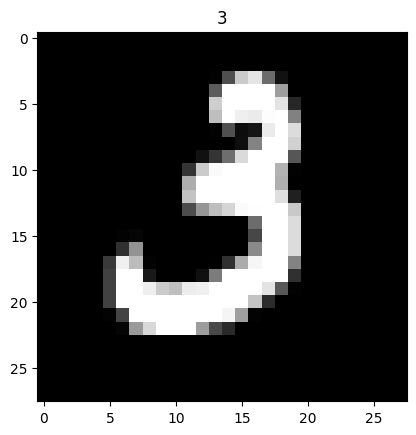

In [92]:
plt.imshow(random_sample[0].squeeze(), cmap='gray')
plt.title(class_names[random_label[0]][:1])

In [93]:
pred_labels = make_preds(MNISTModel, random_sample)

pred_labels

tensor([3, 3, 0, 3, 7, 4, 3, 0, 3])

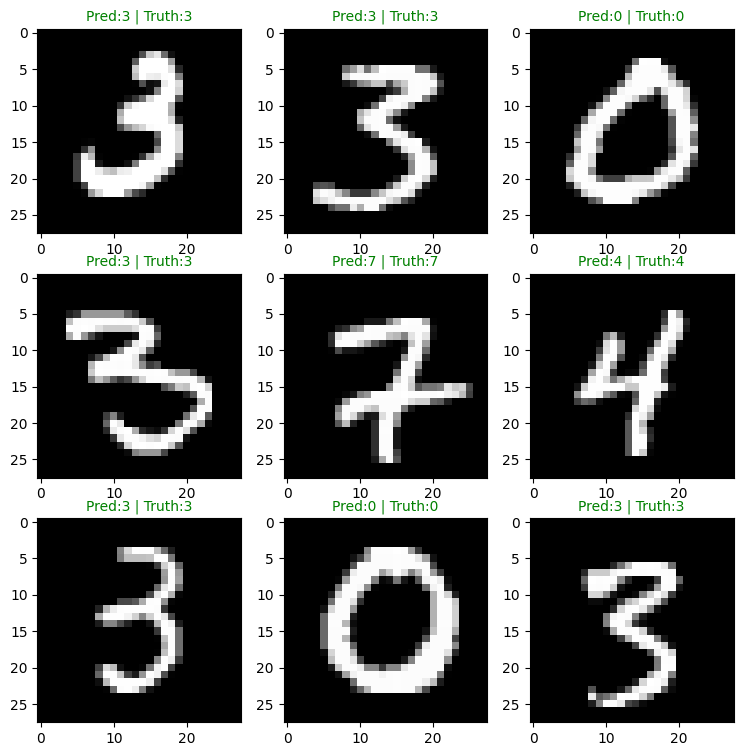

In [94]:
plt.figure(figsize=(9,9))
row, col = 3,3
for i, sample in enumerate(random_sample):
  # Create a subplot for each sample
  plt.subplot(row, col, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the pred label
  pred_label = class_names[pred_labels[i]][:1]

  # Get the truth label in text form
  truth_label = class_names[random_label[i]][:1]

  # Create title for the subplot
  title_text = f'Pred:{pred_label} | Truth:{truth_label}'

  # Check for correct
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [9]:
torch.manual_seed(42)

random_tensor = torch.rand(size=(1,3,64,64))

test_tensor = random_tensor[0]

print(f'Test Tensor Shape: {test_tensor.shape}')

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

conv_output = conv_layer(test_tensor)
print(f'Test Tensor Shape After Convolution: {conv_output.shape}')

Test Tensor Shape: torch.Size([3, 64, 64])
Test Tensor Shape After Convolution: torch.Size([10, 64, 64])


If the `kernel_size` parameter goes up then the height and width of the tensor goes down and vice versa

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [126]:
torch.manual_seed(42)
a = torch.randn(4, 4)
print(a)
torch.argmax(a, dim=0)

tensor([[ 1.9269,  1.4873,  0.9007, -2.1055],
        [ 0.6784, -1.2345, -0.0431, -1.6047],
        [-0.7521,  1.6487, -0.3925, -1.4036],
        [-0.7279, -0.5594, -0.7688,  0.7624]])


tensor([0, 2, 0, 3])